In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


## Data Set Information 

`uci_id`: Unique dataset identifier for UCI repository name
`abstract`: Short description of dataset
`area`: Subject area e.g. life science, business
`task`: Associated machine learning tasks e.g. classification, regression
`characteristics`: Dataset types e.g. multivariate, sequential
`num_instances`: Number of rows or samples
`num_features`: Number of feature columns
`feature_types`: Data types of features
`target_col`: Name of target column(s)
`index_col`: Name of index column(s)
`has_missing_values`: Whether the dataset contains missing values
`missing_values_symbol`: Indicates what symbol represents the missing entries (if the dataset has missing values)
year_of_dataset_creation
`dataset_doi`: DOI registered for dataset that links to UCI repo dataset page
`creators`: List of dataset creator names
`intro_paper`: Information about dataset's published introductory paper
`repository_url`: Link to dataset webpage on the UCI repository
`data_url`: Link to raw data file
`additional_info`: Descriptive free text about dataset
`summary`: General summary
`purpose`: For what purpose was the dataset created?
`funding`: Who funded the creation of the dataset?
`instances_represent`: What do the instances in this dataset represent?
`recommended_data_splits`: Are there recommended data splits?
`sensitive_data`: Does the dataset contain data that might be considered sensitive in any way?
`preprocessing_description`: Was there any data preprocessing performed?


In [5]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
#list_available_datasets()

# import dataset
wine_dataset = fetch_ucirepo(id=186)

In [9]:
wine_dataset.data.features

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [10]:
wine_dataset.data.targets

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [12]:
y = wine_dataset.data.targets
X = wine_dataset.data.features

In [19]:
wine_dataset.metadata.abstract

'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).'

In [20]:
wine_dataset.metadata

{'uci_id': 186,
 'name': 'Wine Quality',
 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality',
 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv',
 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).',
 'area': 'Business',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 4898,
 'num_features': 11,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['quality'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2009,
 'last_updated': 'Wed Nov 15 2023',
 'dataset_doi': '10.24432/C56S3T',
 'creators': ['Paulo Cortez',
  'A. Cerdeira',
  'F. Almeida',
  'T. Matos',
  'J. Reis'],
 'intro_paper': {'ID': 252,
  'type': 'NATIVE',
  'ti

Note:
This dataset has an additional column where you can see if the wine was red or white, could be a great binary classification problem.  Right now we will focus on predicting the quality of the wine from 0-10 which makes this a multi-classification problem.

In [34]:
X.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [35]:
X.shape

(6497, 11)

In [37]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


array([[<Axes: title={'center': 'quality'}>]], dtype=object)

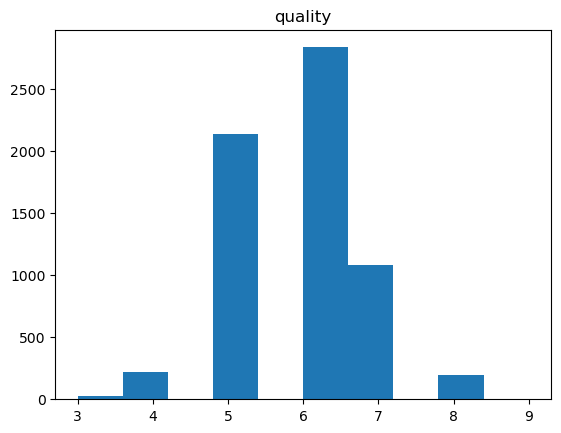

In [29]:
# Lets look at the quantity of each categorical value in the dataset
y.hist(grid = False)

In [33]:
from collections import Counter
Counter(y['quality'])

Counter({6: 2836, 5: 2138, 7: 1079, 4: 216, 8: 193, 3: 30, 9: 5})